<h1>Import bibliotek</h1>

In [215]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

<h1>Wczytanie zbioru danych</h1>

In [216]:
titanic = pd.read_csv("titanic.csv", index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,male


<h1>Oczyszczanie zbioru</h1>

In [217]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Sex       891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Kolumna, która zostanie usunięta to 'Ticket', ponieważ nie jest istotna w kontekście zadania.

In [218]:
titanic = titanic.drop(['Ticket'], axis=1)
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,S,male


Usunięcię wierszy z brakami spowoduje przez kolumnę 'Cabin' utratę bardzo dużej ilości danych, a w przypadku próby wypełnienia jej uzyskamy właściwie kolumnę syntetycznych danych co nie będzie nam przydatne. Utworzymy dodatkową klasę na wartości NaN, pozostałe wartości zmienimy na same litery oznaczające pokłady. Najpierw jeszcze sprawdzimy jakie wartości przyjmują oznaczenia pokładów, żeby oznaczenie nowej klasy się z nimi nie pokryło.

In [219]:
cabs = titanic['Cabin'].notna()
notna = titanic.loc[cabs, 'Cabin']
notna = notna.apply(lambda x: x[0])
notna.unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Możemy użyć 'N' jako oznaczenie nowej klasy.

In [220]:
titanic.fillna({'Cabin':"N"}, inplace = True)
titanic['Cabin'] = titanic['Cabin'].apply(lambda x: x[0])
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,N,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,C,female
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,N,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C,S,female
5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,N,S,male


Kolumna 'Embarked' zawiera tylko 2 brakujące wartości więc najlepiej będzie je wypełnić wartością występującą najczęściej.

In [221]:
x = titanic['Embarked'].mode()[0]
dict = {'Embarked':x}
titanic.fillna(dict, inplace = True)

Kolumna 'Age' zostanie uzupełniona za pomocą losowania wartości zgodnie z jej rozkładem. Sprawdzimy, jednak jeszcze czy rozkład nie różni się w zależności od innych cech: płci i klasy.

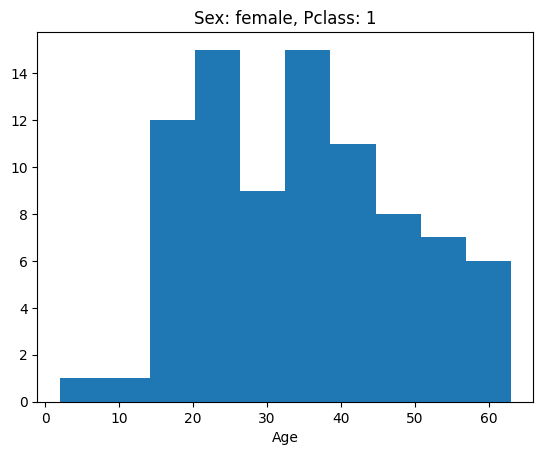

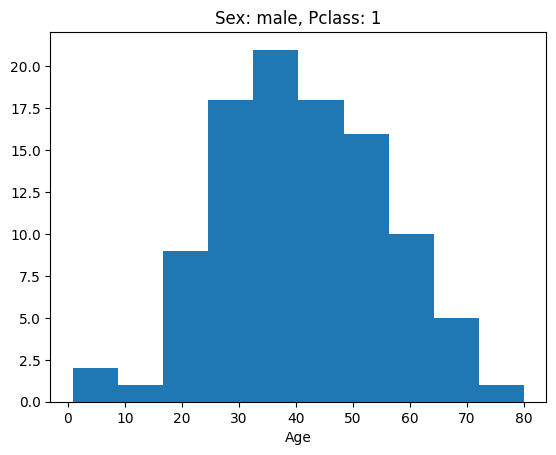

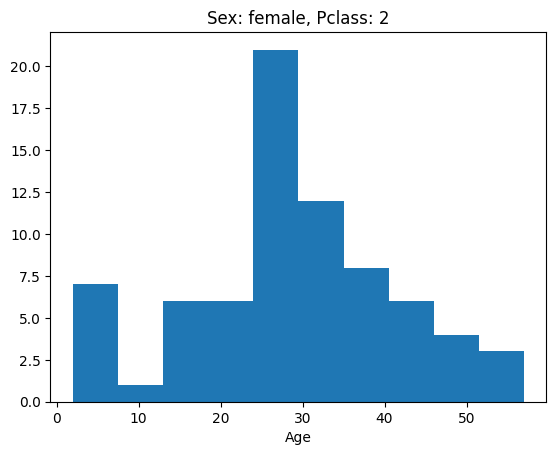

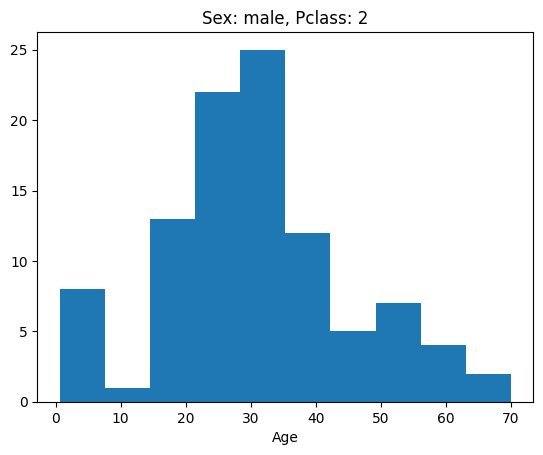

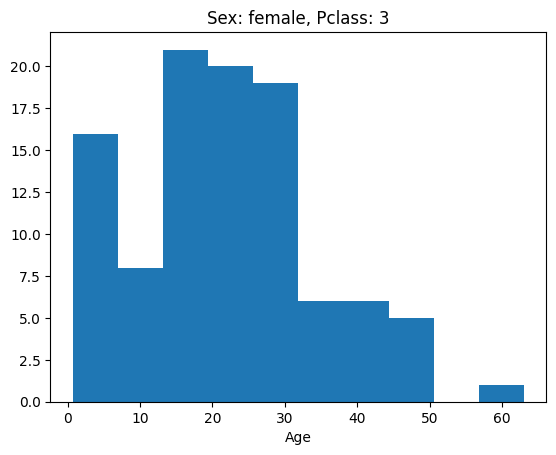

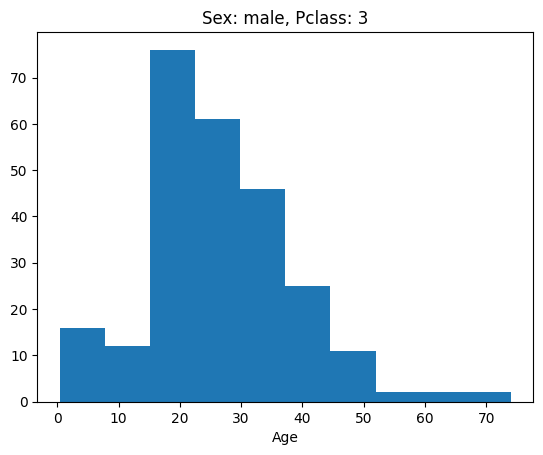

In [222]:
for pclass, group in titanic.groupby('Pclass'):
    for sex, sgroup in group.groupby('Sex'):
        plt.hist(sgroup['Age'])
        plt.title(f"Sex: {sex}, Pclass: {pclass}")
        plt.xlabel('Age')
        plt.show()

Ciekawe jest to, że widać większe różnice w wykresach dla tej samej płci niż tej samej klasy, więc oba te czynniki weźmiemy pod uwagę w uzupełnianiu braków.
<br>Ciekawe jest to, że słupek w okolicy 10 na każdym wykresie jest dość niski - może to świadczyć o największych brakach warości dla właśnie tej grupy wiekowej.

In [223]:
for pclass, group in titanic.groupby('Pclass'):
    for sex, sgroup in group.groupby('Sex'):
        distribution = sgroup['Age'].value_counts(normalize=True)
        values = distribution.index
        probs = distribution.values
        age_NaN = sgroup.Age.isna()
        idx = sgroup.index[age_NaN]
        titanic.loc[idx, 'Age'] = np.random.choice(values, size=age_NaN.sum(), p=probs)

In [224]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
 9   Sex       891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.9+ KB


Jak widać nie ma już żadnych brakujących wartości.

Została nam jeszcze kolumna zawierająca imiona pasażerów, da się z niej wyciągnąć tytuły osób, które może mają wpływ na przeżywalność - bo same imiona na pewno nie mają.

In [225]:
titanic['Name'] = titanic['Name'].apply(lambda x: x.split(",")[1])
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex
PassengerId,,,,,,,,,,
1,0,3,Mr. Owen Harris,22.0,1,0,7.2500,N,S,male
2,1,1,Mrs. John Bradley (Florence Briggs Thayer),38.0,1,0,71.2833,C,C,female
3,1,3,Miss. Laina,26.0,0,0,7.9250,N,S,female
4,1,1,Mrs. Jacques Heath (Lily May Peel),35.0,1,0,53.1000,C,S,female
5,0,3,Mr. William Henry,35.0,0,0,8.0500,N,S,male


In [226]:
titanic['Name'] = titanic['Name'].apply(lambda x: x.split(" ")[1])
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex
PassengerId,,,,,,,,,,
1,0,3,Mr.,22.0,1,0,7.2500,N,S,male
2,1,1,Mrs.,38.0,1,0,71.2833,C,C,female
3,1,3,Miss.,26.0,0,0,7.9250,N,S,female
4,1,1,Mrs.,35.0,1,0,53.1000,C,S,female
5,0,3,Mr.,35.0,0,0,8.0500,N,S,male


In [227]:
titanic['Name'] = titanic['Name'].apply(lambda x: x[:-1])
titanic['Name'].value_counts()

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
th            1
Jonkheer      1
Name: count, dtype: int64

Wiele tytułów występuje tylko w pojedynczych przypadkach - zamienimy je na łączoną wartość "other". Progiem będzie 30 wystąpień.

In [228]:
titanic['Name'] = titanic['Name'].apply(lambda x: x if titanic['Name'].value_counts().get(x, 0)>30 else 'Other')
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex
PassengerId,,,,,,,,,,
1,0,3,Mr,22.0,1,0,7.2500,N,S,male
2,1,1,Mrs,38.0,1,0,71.2833,C,C,female
3,1,3,Miss,26.0,0,0,7.9250,N,S,female
4,1,1,Mrs,35.0,1,0,53.1000,C,S,female
5,0,3,Mr,35.0,0,0,8.0500,N,S,male


In [229]:
titanic['Name'].value_counts()

Name
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

Yippe

<h1>Wstawienie dodatkowych kolumn</h1>

Informacją, która może okazać się przydatna jest liczba wszystkich członków rodziny (rodzeństwa, małżonków, rodziców i dzieci) na pokładzie razem.

In [230]:
titanic['FamilyMembers'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex,FamilyMembers
PassengerId,,,,,,,,,,,
1,0,3,Mr,22.0,1,0,7.2500,N,S,male,1
2,1,1,Mrs,38.0,1,0,71.2833,C,C,female,1
3,1,3,Miss,26.0,0,0,7.9250,N,S,female,0
4,1,1,Mrs,35.0,1,0,53.1000,C,S,female,1
5,0,3,Mr,35.0,0,0,8.0500,N,S,male,0


Następną ukrytą cechą, którą da się zdobyć ze zbioru jest podział na dzieci i dorosłych (od razu z kodowaniem). 

In [231]:
titanic['IsChild'] = np.where(titanic['Age'] >= 18, 0, 1)
titanic.head(15)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex,FamilyMembers,IsChild
PassengerId,,,,,,,,,,,,
1,0,3,Mr,22.0,1,0,7.2500,N,S,male,1,0
2,1,1,Mrs,38.0,1,0,71.2833,C,C,female,1,0
3,1,3,Miss,26.0,0,0,7.9250,N,S,female,0,0
4,1,1,Mrs,35.0,1,0,53.1000,C,S,female,1,0
5,0,3,Mr,35.0,0,0,8.0500,N,S,male,0,0
6,0,3,Mr,19.0,0,0,8.4583,N,Q,male,0,0
7,0,1,Mr,54.0,0,0,51.8625,E,S,male,0,0
8,0,3,Master,2.0,3,1,21.0750,N,S,male,4,1
9,1,3,Mrs,27.0,0,2,11.1333,N,S,female,2,0


<h1>Kodowanie zmiennych kategorialnych</h1>

Zmienne kategorialne w naszym zbiorze zawierają kolumny 'Cabin', 'Name', 'Sex', 'Embarked' i 'Pclass'.

In [233]:
print(titanic.Cabin.unique())
print(titanic.Name.unique())
print(titanic.Sex.unique())
print(titanic.Embarked.unique())
print(titanic.Pclass.unique())

['N' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['male' 'female']
['S' 'C' 'Q']
[3 1 2]


Dzięki powyższemu kodowi widać, że kolumny nie zawierają żadnych nieprawidłowych wartości, które mogłyby mieć negatywny wpływ na kodowanie.
<br>Kolumna 'Pclass' już zawiera kategorie w formacie liczbowym, więc nie trzeba jej zmieniać.

In [234]:
titanic['Cabin'] = LabelEncoder().fit_transform(titanic.Cabin)
titanic['Cabin'].value_counts()

Cabin
7    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
8      1
Name: count, dtype: int64

In [235]:
titanic['Name'] = LabelEncoder().fit_transform(titanic.Name)
titanic['Name'].value_counts()

Name
2    517
1    182
3    125
0     40
4     27
Name: count, dtype: int64

In [236]:
titanic['Sex'] = titanic.Sex.map({'female': 1, 'male': 0})
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex,FamilyMembers,IsChild
PassengerId,,,,,,,,,,,,
1,0,3,2,22.0,1,0,7.2500,7,S,0,1,0
2,1,1,3,38.0,1,0,71.2833,2,C,1,1,0
3,1,3,1,26.0,0,0,7.9250,7,S,1,0,0
4,1,1,3,35.0,1,0,53.1000,2,S,1,1,0
5,0,3,2,35.0,0,0,8.0500,7,S,0,0,0


In [237]:
titanic['Embarked'] = titanic.Embarked.map({'S': 2, 'C': 1, 'Q': 0})
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex,FamilyMembers,IsChild
PassengerId,,,,,,,,,,,,
1,0,3,2,22.0,1,0,7.2500,7,2,0,1,0
2,1,1,3,38.0,1,0,71.2833,2,1,1,1,0
3,1,3,1,26.0,0,0,7.9250,7,2,1,0,0
4,1,1,3,35.0,1,0,53.1000,2,2,1,1,0
5,0,3,2,35.0,0,0,8.0500,7,2,0,0,0


<h1>Badanie występowania wartości skrajnych</h1>

Kolumny zawierające dane kategorialne zostały zbadane pod względem wartości skrajnych podczas rozwiązywania poprzedniego zagadnienia dlatego teraz zajmiemy się wartościami numerycznymi.
<br>Kolumnami dodanymi wcześniej też nie ma potrzeby się zajmować, więc analizie poddane zostaną kolumny: 'Age', 'SibSp', 'Parch', 'Fare'.

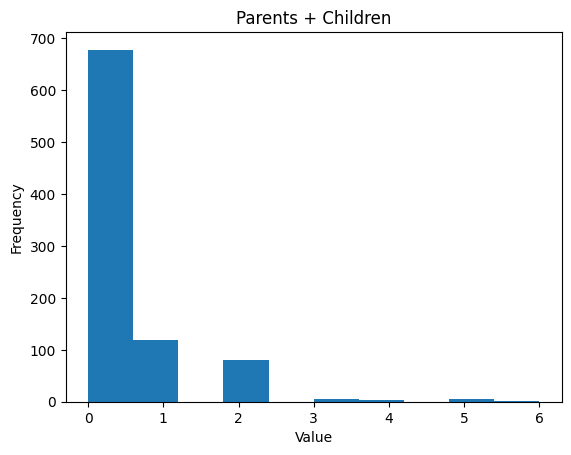

In [238]:
plt.hist(titanic['Parch'])
plt.title("Parents + Children")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

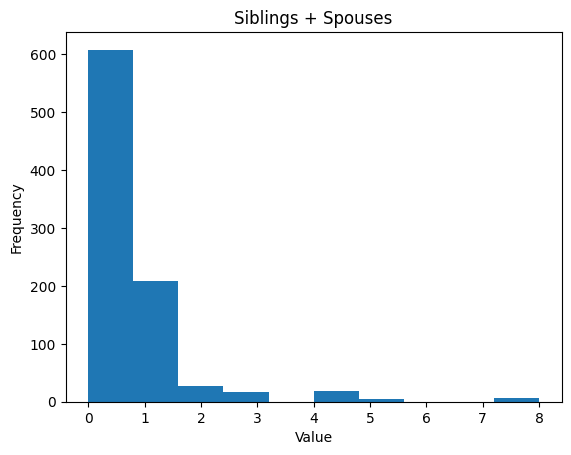

In [239]:
plt.hist(titanic['SibSp'])
plt.title("Siblings + Spouses")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

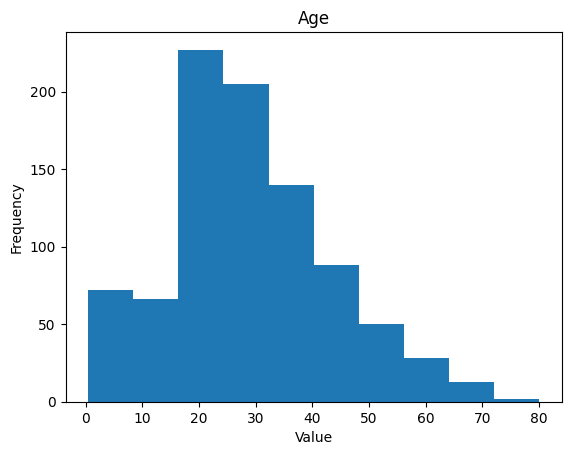

In [240]:
plt.hist(titanic['Age'])
plt.title("Age")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Bazując na wykresach wartości, które zostały podane w kolumnach 'SibSp', 'Parch' i 'Age' wyglądają wiarygodnie i nie wymagają specjalnego przetwarzania.

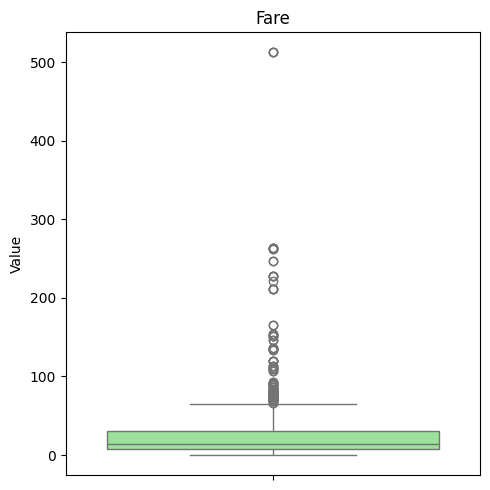

In [241]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=titanic['Fare'], color='lightgreen')
plt.title("Fare")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

Na powyższym wykresie widać grupę odstających cen za bilety oraz pojedynczą najwyższą cenę znacząco odstającą od reszty.
<br>Bilety w odstającej grupie mogły zostać zakupione przez najbardziej zamożną część podróżujących - z tego powodu jest ich na tyle mało, że kwalifikują się jako wartości odstające.
<br>Pojedyncza wartość może mieć takie samo wytłumaczenie jak opisane powyżej lub może być to błąd.

<h1>Wizualizacje cech</h1>

In [242]:
titanic.columns.tolist()

['Survived',
 'Pclass',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked',
 'Sex',
 'FamilyMembers',
 'IsChild']

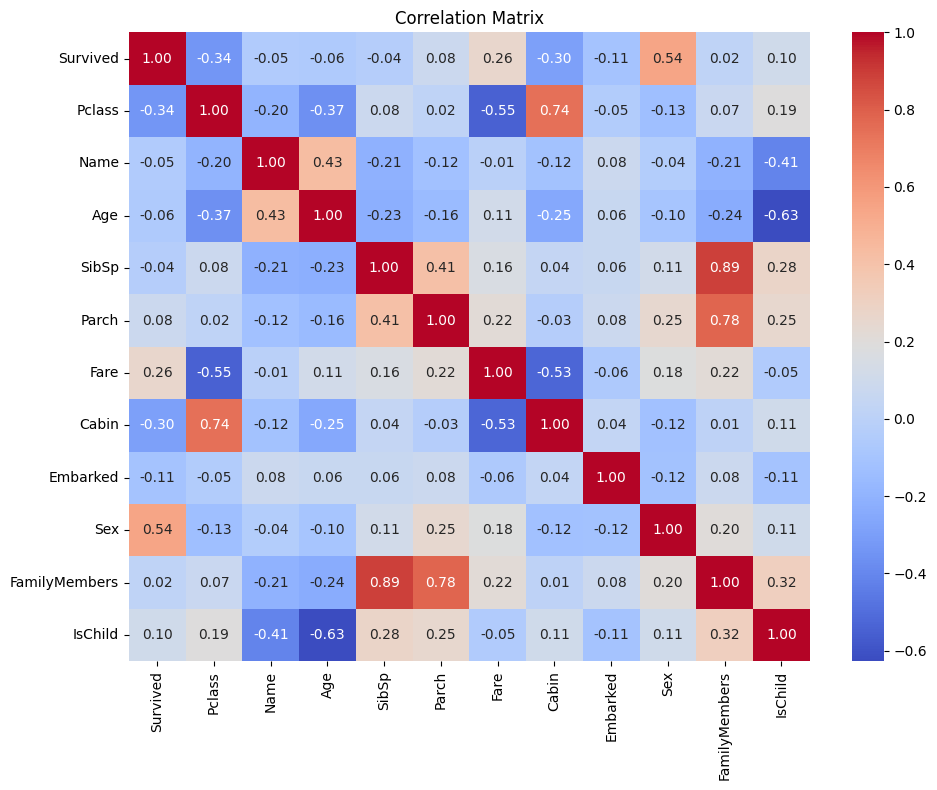

In [243]:
corr = titanic.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Wysoka korelacja Cabin z Survived może wynikać z tego, że większość wartości to sztucznie wstawiona klasa 'N'.

<Axes: xlabel='Survived', ylabel='Cabin'>

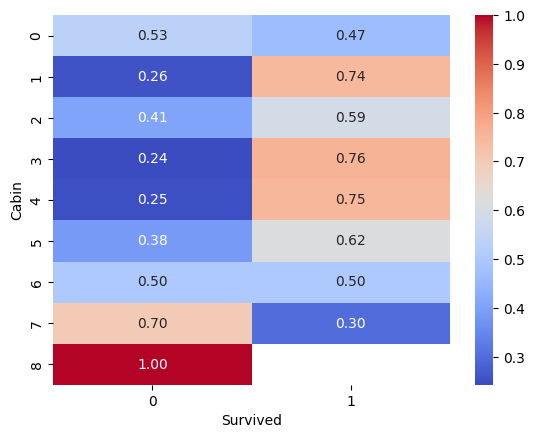

In [245]:
sns.heatmap(titanic.groupby("Cabin")["Survived"].value_counts(normalize=True).unstack(),annot=True, 
            fmt=".2f", cmap="coolwarm")

7 klasa to klasa sztuczna i widać w niej dużo śmierci, ponieważ większość osób miało klasę 7 i większość osób umarła.

Na heatmapie poza przekątną widać silną korelację między FamilyMembers, a SibSp i Parch co jest spowodowane tym, że kolumna ta powstała na podstawie tamtych dwóch. Podobny powód zapewnia wysoką negatywną korelację IsChild i Age.

In [246]:
for pclass, group in titanic.groupby('Pclass'):
    print(f"Percentage of Survival in class {pclass}:")
    sur = group[group['Survived'] == 1]
    print(round(((len(sur)/len(group))*100),2), "%\n")

Percentage of Survival in class 1:
62.96 %

Percentage of Survival in class 2:
47.28 %

Percentage of Survival in class 3:
24.24 %



Widać, że największe szanse na przeżycie miały osoby z klasy 1.

In [247]:
for sex, group in titanic.groupby('Sex'):
    enc = "women" if sex == 1 else "men"
    print(f"Percentage of Survival for {enc}:")
    sur = group[group['Survived'] == 1]
    print(round(((len(sur)/len(group))*100),2), "%\n")

Percentage of Survival for men:
18.89 %

Percentage of Survival for women:
74.2 %



Jest bardzo duża różnica w przeżywalności kobiet i mężczyzn.

In [248]:
for sur, group in titanic.groupby('Survived'):
    enc = "survived" if sur == 1 else "did not survive"
    print(f"Mean and median of Fare for people who {enc}:")
    print("Mean:", round(group['Fare'].mean(),2))
    print("Median:", round(group['Fare'].median(),2), "\n")

Mean and median of Fare for people who did not survive:
Mean: 22.12
Median: 10.5 

Mean and median of Fare for people who survived:
Mean: 48.4
Median: 26.0 



Osoby, które zapłaciły więcej miały większe szanse na przeżycie.

In [249]:
print(f"Percentage of Survival for children (age < 2):")
age = titanic[titanic['Age'] < 2]
sur = age[age['Survived'] == 1]
print(round(((len(sur)/len(age))*100),2), "%\n")
print(f"Percentage of Survival for children (age < 10):")
age = titanic[titanic['Age'] < 10]
sur = age[age['Survived'] == 1]
print(round(((len(sur)/len(age))*100),2), "%\n")
print(f"Percentage of Survival for adults (20 < age < 40):")
age = titanic[titanic['Age'] < 40]
age = age[age['Age'] > 20]
sur = age[age['Survived'] == 1]
print(round(((len(sur)/len(age))*100),2), "%\n")
print(f"Percentage of Survival for adults (50 < age):")
age = titanic[titanic['Age'] > 50]
sur = age[age['Survived'] == 1]
print(round(((len(sur)/len(age))*100),2), "%\n")

Percentage of Survival for children (age < 2):
73.68 %

Percentage of Survival for children (age < 10):
56.1 %

Percentage of Survival for adults (20 < age < 40):
37.69 %

Percentage of Survival for adults (50 < age):
34.25 %



Widać, że młodsi mieli większe szanse na przeżycie.

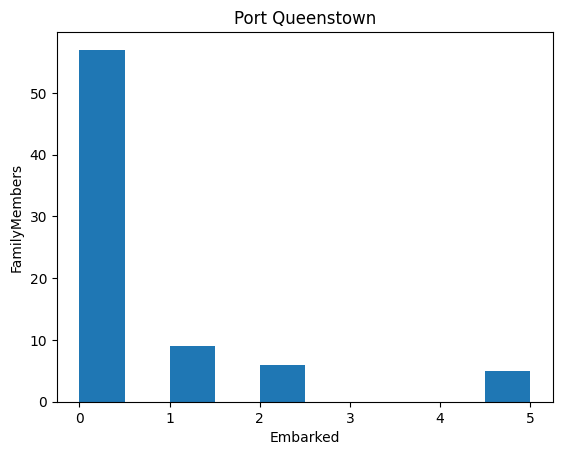

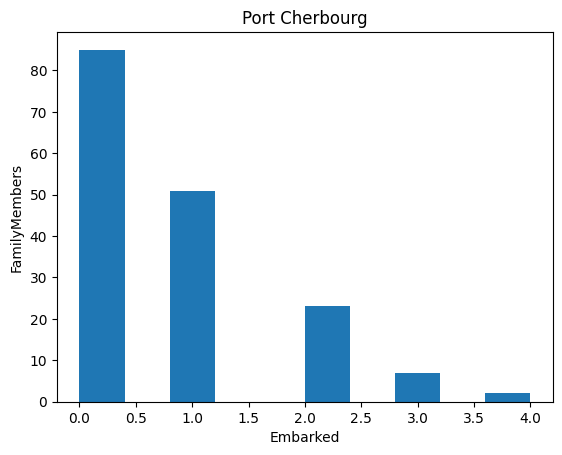

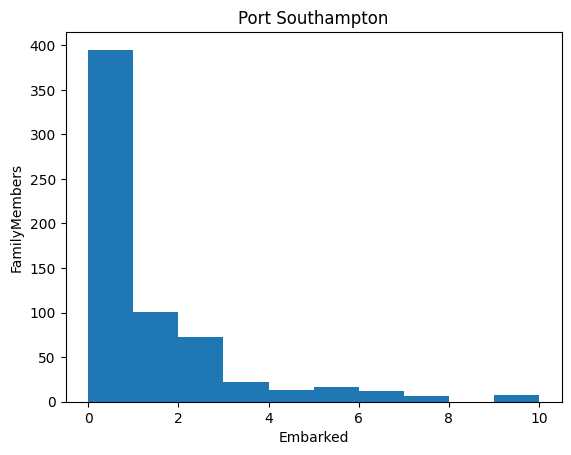

In [250]:
for port, group in titanic.groupby('Embarked'):
    enc = {1:'Cherbourg', 0:'Queenstown', 2:'Southampton'}
    plt.hist(group['FamilyMembers'])
    plt.title(f"Port {enc.get(port)}")
    plt.xlabel("Embarked")
    plt.ylabel("FamilyMembers")
    plt.show()

Najwięcej i największe rodziny wsiadały w porcie Southampton, a najmniej i najmniejsze w Queenstown - możliwe, że istniały różnice między strukturą społeczeństw tych miast.

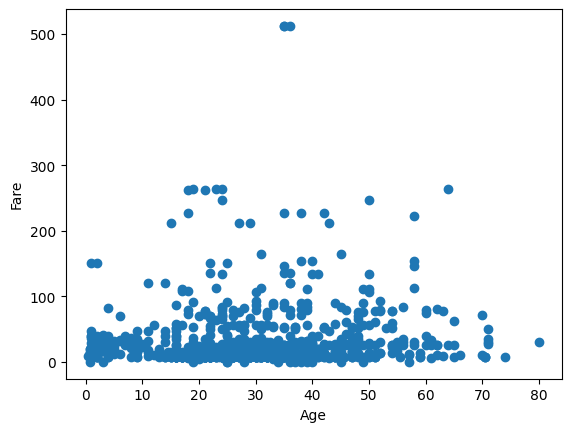

In [251]:
plt.scatter(titanic['Age'], titanic['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

Nie ma zależności między wysokością opłaty za bilet a wiekiem pasażera.

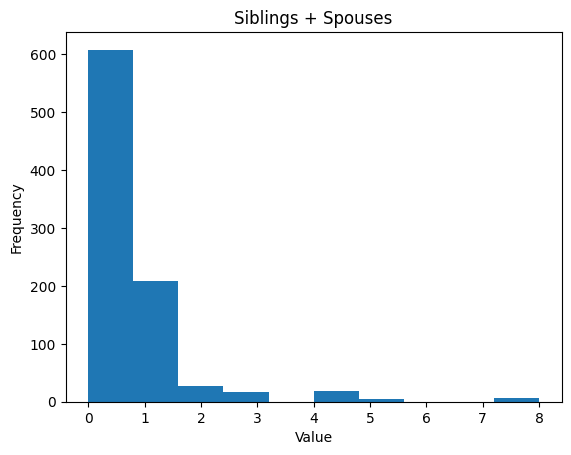

In [252]:
plt.hist(titanic['SibSp'])
plt.title("Siblings + Spouses")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

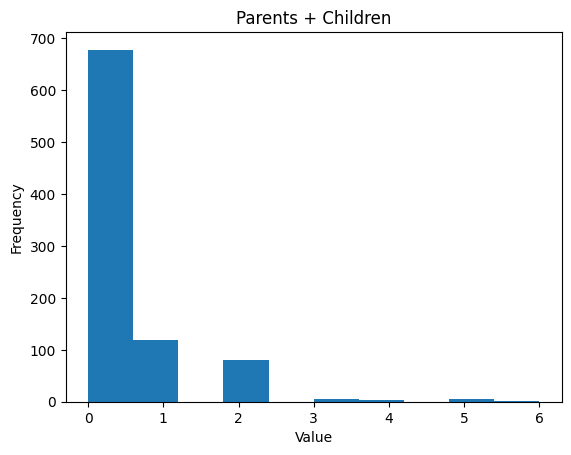

In [253]:
plt.hist(titanic['Parch'])
plt.title("Parents + Children")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Widać, że większość podróżowała bez rodzeństwa, małżonków, rodziców ani dzieci.

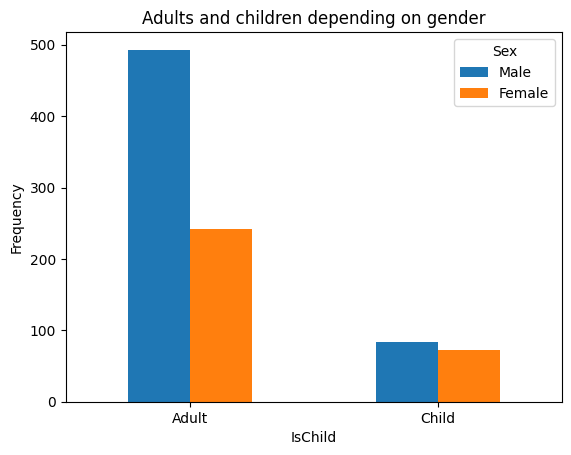

In [254]:
counts = titanic.groupby(['IsChild', 'Sex']).size().unstack(fill_value=0)
counts.index = counts.index.map({0: 'Adult', 1: 'Child'})
counts.columns = counts.columns.map({0: 'Male', 1: 'Female'})
counts.plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Adults and children depending on gender')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.show()

W obu grupach wiekowych dominuje płeć męska oraz widać znaczącą przewagę liczby dorosłych nad liczbą dzieci na pokładzie.

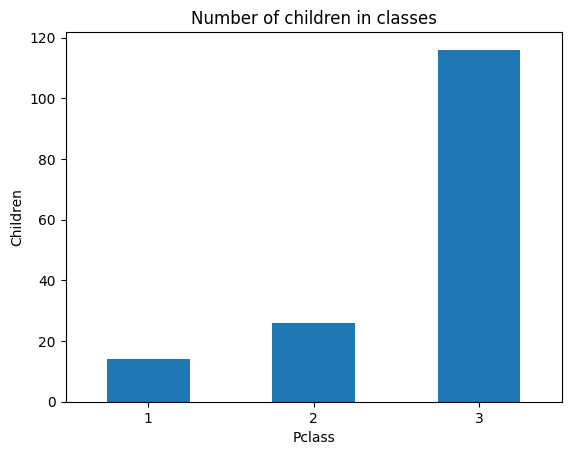

In [255]:
child = titanic[titanic['IsChild'] == 1].groupby('Pclass').size()
child.plot(kind='bar')
plt.title('Number of children in classes')
plt.xlabel('Pclass')
plt.ylabel('Children')
plt.xticks(rotation=0)
plt.show()

Jak widać najwięcej dzieci było w klasie trzeciej.

<h1>Zapisanie przetworzonego zbioru</h1>

In [257]:
titanic.to_csv('titanic_przetworzony.csv')